## Importing Libraries and loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading data
df = pd.read_csv("spam.tsv", sep='\t')

In [4]:
# Printing first 5 rows
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
# Getting shape of the dataset
df.shape

(5572, 4)

In [6]:
# description of dataset
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
# finding the missing records in the dataset 
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df['label'].value_counts()        

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
(df['label'].value_counts() *100)/  len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [10]:
ham = df [df['label'] == 'ham']
spam = df [df['label'] == 'spam']

In [11]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [12]:
# To balance the data I'll be choosing ranmonly ham records
ham = ham.sample(spam.shape[0])

In [13]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam, ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [18]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [24]:
data.head()

,label,message,length,punct
0,ham,"That's fine, have him give me a call if he kno...",83,2
1,ham,Thank You meet you monday,25,0
2,ham,Umma. Did she say anything,26,1
3,ham,Yes. Please leave at &lt;#&gt; . So that at ...,69,12
4,ham,"I just got home babe, are you still awake ?",43,2


### Vizualization of data

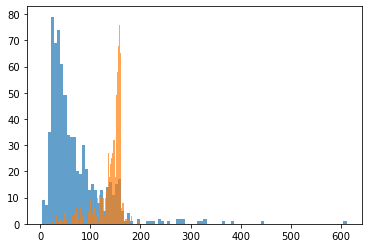

In [23]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha= 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha= 0.7)

plt.show()

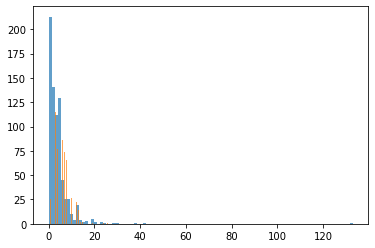

In [25]:
plt.hist(data[data['label'] == 'ham']['punct'], bins=100, alpha= 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins=100, alpha= 0.7)

plt.show()

In [26]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

## Building The model (Random Forest)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [32]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [33]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

### Predicting the Result (RF)

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100,'\n')
print('Confusion Matrics:\n',confusion_matrix(y_test, y_pred),'\n')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy Score: 95.54565701559021 

Confusion Matrics:
 [[226   1]
 [ 19 203]] 

Classification Report: 
               precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



## Building The Model(SVM)

In [42]:
from sklearn.svm import SVC

In [45]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [46]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

### Predicting the Result(SVM)

In [47]:
y_pred_svm = svm.predict(x_test)

In [53]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_svm)*100,'\n')
print('Confusion Matrics:\n',confusion_matrix(y_test, y_pred_svm),'\n')
print('Classification Report: \n',classification_report(y_test,y_pred_svm))

Accuracy Score: 95.10022271714922 

Confusion Matrics:
 [[222   5]
 [ 17 205]] 

Classification Report: 
               precision    recall  f1-score   support

         ham       0.93      0.98      0.95       227
        spam       0.98      0.92      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## Testing on other data

In [55]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [56]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [57]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
